# HW 3
## Problem 1
#### A)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 100
ppl = 52
bd = 48
nn_ppl_err = 5
nn_bd_err = 3
na_ppl_err = 11
na_bd_err = 1

nn_tot_err = nn_ppl_err + nn_bd_err
na_tot_err = na_ppl_err + na_bd_err
print('Total mistakes in NN: ', nn_tot_err)
print('Total mistakes in NA: ', na_tot_err)

Total mistakes in NN:  8
Total mistakes in NA:  12


From here, we can see that the total mistakes made in the new algorithm is larger than the old neural network.

#### B)

The new algorithm is more suitable for the zoo than the old neural network. Although the new algorithm makes more mistakes in general than the old one, the mistakes made in classifying birds is much less than the old neural network. In the scenario of the zoo, we want to have better classification against the birds and we do not care about mistakes in people as much. Thus, the New Algorithm is much better for the zoo.

In [3]:
table_NN = pd.DataFrame([['NN', 'True bird', 'True Person'],['NN Bird', 93, 0], ['NN Person', 6, 1]])
table_NN

,0,1,2
0,NN,True bird,True Person
1,NN Bird,93,0
2,NN Person,6,1


In [4]:
table_NA = pd.DataFrame([['NA', 'True bird', 'True Person'],['NA Bird', 97, 0], ['NA Person', 2, 1]])
table_NA

,0,1,2
0,NA,True bird,True Person
1,NA Bird,97,0
2,NA Person,2,1


## Problem 2
#### A)

First, I looked up exponential distributions online, which was the [Wikipedia page](https://en.wikipedia.org/wiki/Exponential_distribution#Sum_of_two_independent_exponential_random_variables). On there, we can see the sum of two independent exponential distributions. When adding up two identical exponential distributions, we use the result function $\lambda^2ze^{-\lambda z}$. This result is actually the gamma distribution as being showed on [here](https://en.wikipedia.org/wiki/Gamma_distribution).

In [5]:
import scipy.signal as signal
from scipy.stats import expon
from scipy.stats import gamma
import matplotlib.pyplot as plt

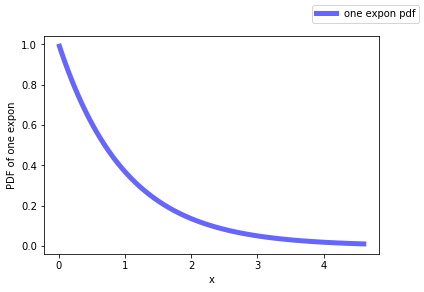

In [6]:
fig, ax = plt.subplots(1, 1)
x_expon = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
exp1 = expon.pdf(x_expon)
ax.plot(x_expon, exp1,
       'b-', lw=5, alpha=0.6, label='one expon pdf')
plt.xlabel('x')
plt.ylabel('PDF of one expon')
fig.legend()
plt.show()

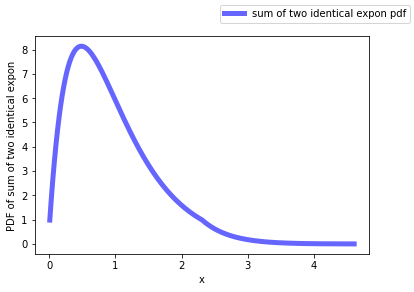

In [7]:
for i in range(1):
    result = signal.convolve(exp1, exp1)
x_sum_expon = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), len(result))
fig, ax = plt.subplots(1, 1)
ax.plot(x_sum_expon, result,
       'b-', lw=5, alpha=0.6, label='sum of two identical expon pdf')
plt.xlabel('x')
plt.ylabel('PDF of sum of two identical expon')
fig.legend()
plt.show()

Assume $\lambda$=1 and we have the sum function as $ze^{-z}$. In this case, the parameter a of gamma function is 2 because a-1=1.

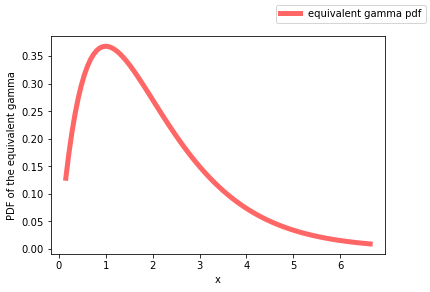

In [8]:
a = 2
x_gamma = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x_gamma, gamma.pdf(x_gamma, a),
       'r-', lw=5, alpha=0.6, label='equivalent gamma pdf')
plt.xlabel('x')
plt.ylabel('PDF of the equivalent gamma')
fig.legend()
plt.show()

From the above plot, we can see that the sum of two identical exponential distributions does have a similar shape to with the gamma function. By changing the $\lambda$ and a in gamma function to proper values, we shoule be able to obtain the same pdf.

#### B)

First, I looked up the normal distribution on this [website](https://mathworld.wolfram.com/NormalDistribution.html). Then, by browsering through the website, we can see the [normal ratio distribution page](https://mathworld.wolfram.com/NormalRatioDistribution.html) which shows that the ratio of two normal distribution is a [Cauchy distribution](https://mathworld.wolfram.com/CauchyDistribution.html). 

In [9]:
from scipy.stats import norm
from scipy.stats import cauchy
from scipy.stats import rvs_ratio_uniforms as ratio

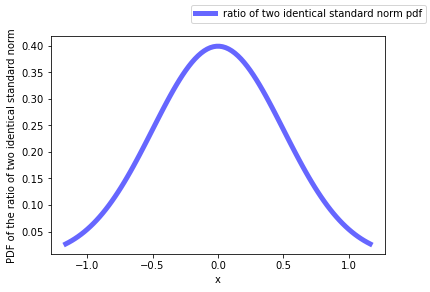

In [10]:
x_norm = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
norm1 = norm.pdf(x_norm)
fig, ax = plt.subplots(1, 1)
ax.plot(x_norm/2, norm1,
       'b-', lw=5, alpha=0.6, label='ratio of two identical standard norm pdf')
plt.xlabel('x')
plt.ylabel('PDF of the ratio of two identical standard norm')
fig.legend()
plt.show()

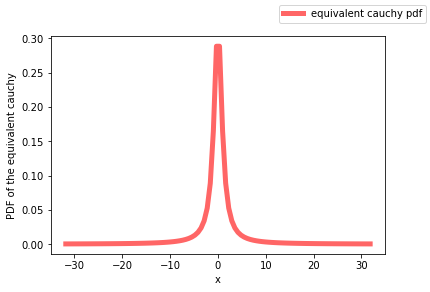

In [11]:
x_cauchy = np.linspace(cauchy.ppf(0.01),
                cauchy.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x_cauchy, cauchy.pdf(x_cauchy),
       'r-', lw=5, alpha=0.6, label='equivalent cauchy pdf')
plt.xlabel('x')
plt.ylabel('PDF of the equivalent cauchy')
fig.legend()
plt.show()

From the document we can see that the pdf of cauchy of two independent normal distributions should be $P_{X/Y}(u)=1/\pi(({\sigma_x/\sigma_y})/({u^2+{\sigma_x/\sigma_y}^2}))$. In this case, X=Y and $\sigma_x=\sigma_y$. When terms cancels out, the remainder is $1/({\pi u^2+\pi})$, and we can see from above, that if we properly rearrange the x-axis in the ratio of normal distribution, we should be able to obtain a cauchy pdf.

#### C)

First, I looked up 2D Gaussian distribution which is the Multivariate normal distribution on [Wikepedia](https://en.wikipedia.org/wiki/Multivariate_normal_distribution). From there we can see that the pdf of 2D Gaussian distribution is the linear combination of every vector from the two composing 1D Gaussian distributions.

In [12]:
from scipy.stats import multivariate_normal

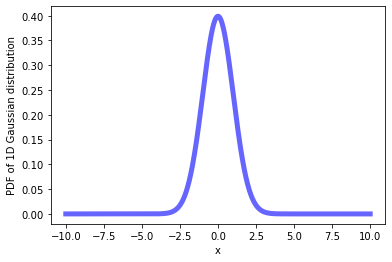

In [13]:
x = np.linspace(-10, 10, 10000, endpoint=False)
y = multivariate_normal.pdf(x);
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(x, y, 'b-', lw=5, alpha=0.6, label='1D Gaussian distribution')
plt.xlabel('x')
plt.ylabel('PDF of 1D Gaussian distribution')
fig.legend()
plt.show()

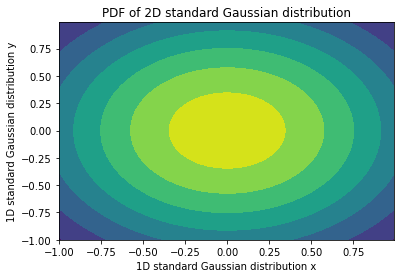

In [14]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0, 0])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))
plt.xlabel('1D standard Gaussian distribution x')
plt.ylabel('1D standard Gaussian distribution y')
plt.title('PDF of 2D standard Gaussian distribution')
plt.show()

From the above, we can see that the pdf of two identical standard Gaussian distribution in 2D is a coutor map with the high density marked by bright color in the middle and the low density showed by dim color on the corners. 